<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [819]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [820]:
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [821]:
display(df.head())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице. 4. Обратите внимание на информацию о числе непустых значений.

In [822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [823]:
display(df.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [824]:
df['Образование'] = df['Образование и ВУЗ'].apply(lambda row: ' '.join(row.split(' ')[:2]))
#display(df['Образование'].unique())
df['Образование'] = df['Образование'].map(
    {'Неоконченное высшее': 'неоконченное высшее',
     'Высшее образование': 'высшее',
     'Среднее специальное': 'среднее специальное',
     'Среднее образование': 'среднее'}
)

In [825]:
df = df.drop('Образование и ВУЗ', axis=1)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [826]:
def extract_data(row, what_need):
    result = row.split(' , ', 2)[what_need]
    if what_need == 0:
        if result == 'Мужчина':
            return 'М'
        else:
            return 'Ж'
    else:
        result = np.uint16(result.split(' ')[1])
        return result


df['Пол'] = df['Пол, возраст'].apply(extract_data, args=(0,))
df['Возраст'] = df['Пол, возраст'].apply(extract_data, args=(1,))
display(df[['Пол', 'Возраст']].head())

,Пол,Возраст
0,М,39
1,М,60
2,Ж,36
3,М,38
4,Ж,26


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [827]:
def extract_exp(row):
    if any((pd.isnull(row), row == "Не указано")):
        return np.nan
    else:
        result = row.split('  ', 1)[0]
        result = result.replace('Опыт работы ', '')
        if re.search(r"\bлет|\bгод", result) and re.search(r"\bмес", result):
            years, months = re.findall(r'\d+', result)
            result = np.uint8(years) * 12 + np.uint8(months)
            return result
        elif re.search(r"\bлет|\bгод", result):
            year = re.search(r'\d+', result).group()
            year = np.uint8(year)
            result = year * 12
            return result
        elif re.search(r"\bмес", result):
            month = re.search(r'\d+', result).group()
            month = np.uint8(month)
            return month


df['Опыт работы (месяц)'] = df['Опыт работы'].apply(extract_exp)  #.astype(np.uint16)
df = df.drop('Опыт работы', axis=1)
display(df['Опыт работы (месяц)'].head())

0    202.0
1    233.0
2    123.0
3    225.0
4     67.0
Name: Опыт работы (месяц), dtype: float64

In [828]:
# if re.search(r"\bлет|\bгод",'16 лет 10 месяцев') and re.search(r"\bлет|\bгод",'3 года 10 месяцев'):
#     print(re.findall(r'\d+','16 лет 10 месяцев'))
#     print(re.search(r"\bлет|\bгод",'16 лет 10 месяцев').group(),re.search(r"\bлет|\bгод",'3 года 10 месяцев').group())
# if re.search(r"\bлет|\bгод",'16 лет'):
#     print(re.search(r'\d+','16 лет').group())

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [829]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара',
                  'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']


def extract_data(row):
    city = row[0]
    city = city.replace(" ", "")
    if city in million_cities:
        city = 'город-миллионник'
    elif any((city == 'Москва', city == 'Санкт-Петербург')):
        city = row[0]
    else:
        city = 'другие'

    removal = row[1]

    if re.search(r'\bм\.', row[1]):
        removal = row[2]

    if re.search(r'\bне готов.', removal):
        removal = False
    else:
        removal = True
    business_trip = row[2]
    if re.search(r'\bм\.', row[1]):
        business_trip = row[3]
    if re.search(r'\bне готов.', business_trip):
        business_trip = False
    else:
        business_trip = True
    result = pd.Series(data=[city, removal, business_trip],
                       index=['Город', 'Готовность к переезду', 'Готовность к командировкам'])
    return result


df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = df['Город, переезд, командировки'].apply(
    lambda col: extract_data(col.split(',')))
df = df.drop('Город, переезд, командировки', axis=1)
display(df.head(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False


|5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий
желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [830]:
df['полная_занятость'] = df['Занятость'].str.contains('полная занятость')
df['частичная_занятость'] = df['Занятость'].str.contains('частичная занятость')
df['проектная_работа'] = df['Занятость'].str.contains('проектная работа')
df['волонтерство'] = df['Занятость'].str.contains('волонтерство')
df['стажировка'] = df['Занятость'].str.contains('стажировка')
df['полный_день'] = df['График'].str.contains('полный день')
df['сменный_график'] = df['График'].str.contains('сменный график')
df['гибкий_график'] = df['График'].str.contains('гибкий график')
df['удаленная_работа'] = df['График'].str.contains('удаленная работа')
df['вахтовый_метод'] = df['График'].str.contains('вахтовый метод')
display(df.head())

,"Пол, возраст",ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,...,полная_занятость,частичная_занятость,проектная_работа,волонтерство,стажировка,полный_день,сменный_график,гибкий_график,удаленная_работа,вахтовый_метод
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,...,True,True,True,False,False,True,True,True,True,True
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,...,True,True,True,False,False,True,True,True,True,False
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,...,True,False,False,False,False,True,False,False,False,False
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,...,True,True,True,False,False,False,False,True,True,False
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,...,True,False,False,False,False,True,False,False,False,False


In [831]:
df = df.drop(["Занятость", "График"], axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [832]:
currencies = pd.read_csv('ExchangeRates.csv')
currencies = currencies[['currency', 'date', 'proportion', 'close']]
df['Обновление резюме'] = pd.to_datetime(pd.to_datetime(df['Обновление резюме']).dt.date)
currencies['date'] = pd.to_datetime(currencies['date'], format="%d/%m/%y")
unique_currencies = list(df['ЗП'].str.split(' ').apply(lambda x: x[1]).value_counts().index)
df['ЗП номинальная'] = df['ЗП'].str.split(' ').apply(lambda x: x[0]).astype(np.int64)
df['Валюта ЗП'] = df['ЗП'].str.split(' ').apply(lambda x: x[1])
df['Валюта ЗП'] = df['Валюта ЗП'].map({'руб.': 'RUB',
                                       'KZT': 'KZT',
                                       'USD': 'USD',
                                       'EUR': 'EUR',
                                       'бел.руб.': 'BYN',
                                       'грн.': 'UAH',
                                       'сум': 'UZS',
                                       'KGS': 'KGS',
                                       'AZN': 'AZN'})


#display(df[['ЗП номинальная','Валюта ЗП']])

#display(unique_currencies)
def remove_proportion(row):
    if row['proportion'] != 1:
        return row['close'] / row['proportion']
    else:
        return row['close']


currencies['rate'] = currencies.apply(remove_proportion, axis=1)
df = df.merge(currencies[['currency', 'date', 'rate']],
              how='left',
              left_on=['Валюта ЗП', 'Обновление резюме'],
              right_on=['currency', 'date'])

df.loc[df['Валюта ЗП'] == 'RUB', 'ЗП (руб)'] = df.loc[df['Валюта ЗП'] == 'RUB', 'ЗП номинальная']
df.loc[df['Валюта ЗП'] != 'RUB', 'ЗП (руб)'] = df.loc[df['Валюта ЗП'] != 'RUB', 'ЗП номинальная'] * df.loc[
    df['Валюта ''ЗП'] != 'RUB', 'rate']
df = df.drop(['currency', 'date', 'ЗП номинальная', 'Валюта ЗП', 'ЗП', 'currency', 'rate', 'ЗП', 'Пол, возраст'],
             axis=1)
display(df.head())

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная_занятость,проектная_работа,волонтерство,стажировка,полный_день,сменный_график,гибкий_график,удаленная_работа,вахтовый_метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-08-04,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0


In [833]:
df[df['ЗП (руб)'] < 1000]

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная_занятость,проектная_работа,волонтерство,стажировка,полный_день,сменный_график,гибкий_график,удаленная_работа,вахтовый_метод,ЗП (руб)
253,Руководитель аналитики/crm/data science,РОСБАНК,Head of analytics and reporting in CRM,2019-10-04,Не указано,высшее,М,34,154.0,Москва,...,False,False,False,False,True,False,False,False,False,420.0000
514,"Oracle DBA, системный инженер",Банк,эксперт,2019-04-19,Не указано,высшее,М,37,162.0,Москва,...,True,True,False,False,True,True,True,True,False,160.0000
552,3D художник,ООО «Центр технологий и медиа групп»,3D-дизайнер,2019-04-26,Не указано,высшее,М,27,48.0,другие,...,True,True,True,True,True,True,True,True,True,452.7558
1087,"Директор по продукту {Internet, Blockchain}",EXSCUDO,Директор по продукту,2019-04-26,Не указано,высшее,М,36,142.0,Москва,...,False,False,False,False,True,False,False,False,False,1.0000
2248,"Электромонтер КИПиА, электромеханик, IT, сеть ...","СК ""Град""","Электромонтажник, ОПС, разнорабочий, стропольщик.",2019-04-16,Не указано,среднее,М,31,62.0,другие,...,True,True,False,True,True,True,True,True,True,250.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41742,web-дизайнер,Monstrptint.ru,Дизайнер. Криэйтор.,2019-08-04,Не указано,высшее,Ж,44,149.0,Москва,...,True,True,False,False,False,False,False,True,False,45.0000
42329,Инженер- программист,"OZON.ru, Интернет-магазин",Разработчик информационных систем,2018-05-12,Не указано,неоконченное высшее,М,29,103.0,Москва,...,False,False,False,False,True,False,False,True,False,140.0000
42841,Ведущий системный администратор,"ГАЗИНФОРМСЕРВИС, ООО",Старший инженер,2019-04-22,Не указано,высшее,М,32,114.0,Санкт-Петербург,...,False,False,False,False,True,True,False,False,False,85.0000
43385,Директор по управлению проектами / Директор по...,One Agile,Исполнительный директор,2019-07-05,Не указано,высшее,М,46,282.0,Москва,...,False,False,False,False,True,False,False,False,False,1.0000


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


медиана=31.0 ; среднее=32.20 ; мода=30 ;
максимум=100
Большинство соискателей имеют возраст 22 до 40 лет. Аномальными значениями можно считать те, что выше 49.5



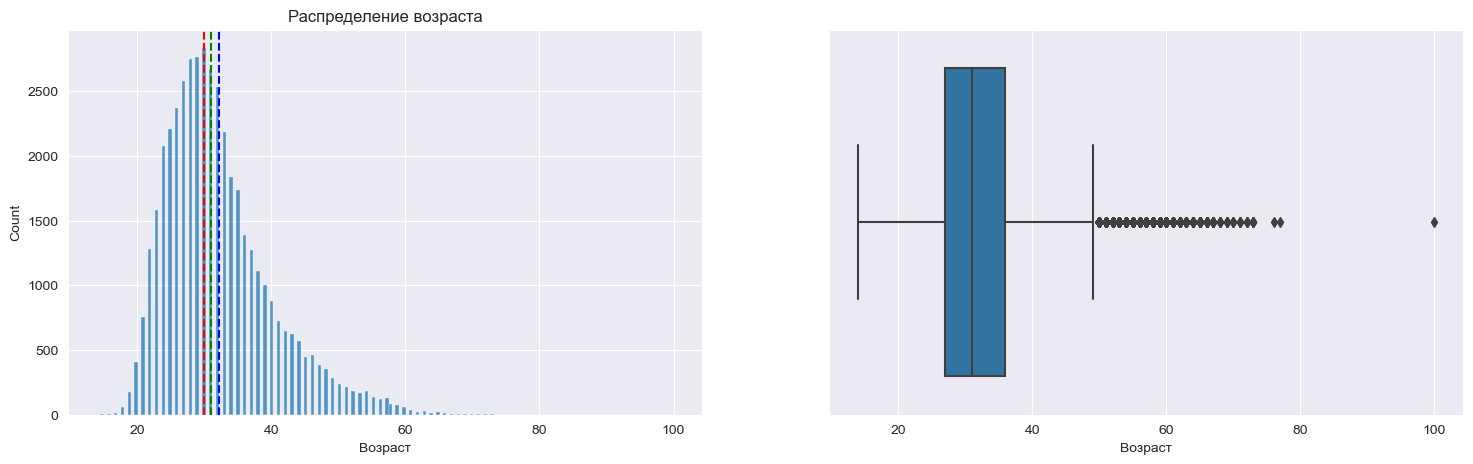

In [834]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
hist_ = sns.histplot(df['Возраст'], kde=False, ax=axes[0])
mode = df['Возраст'].mode()[0]
median = df['Возраст'].median()
mean = df['Возраст'].mean()
hist_.axvline(mode, color='r', linestyle='--')
hist_.axvline(median, color='g', linestyle='--')
hist_.axvline(mean, color='b', linestyle='--')
hist_.set_title('Распределение возраста')
sns.boxplot(x=df['Возраст'], ax=axes[1]);
Q1 = df['Возраст'].quantile(0.25)
Q3 = df['Возраст'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f'''
медиана={df['Возраст'].median()} ; среднее={df['Возраст'].mean():0.2f} ; мода={df['Возраст'].mode()[0]} ;
максимум={df['Возраст'].max()}
Большинство соискателей имеют возраст 22 до 40 лет. Аномальными значениями можно считать те, что выше {upper_bound}
''')

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


медиана=100.0 ; среднее=114.42 ; мода=81.0 ;
максимум=1188.0
Аномальными значениями можно считать те, что выше 299.5
Большая часть соискателей имеет опыт работы от 0 до 350 месяцев.



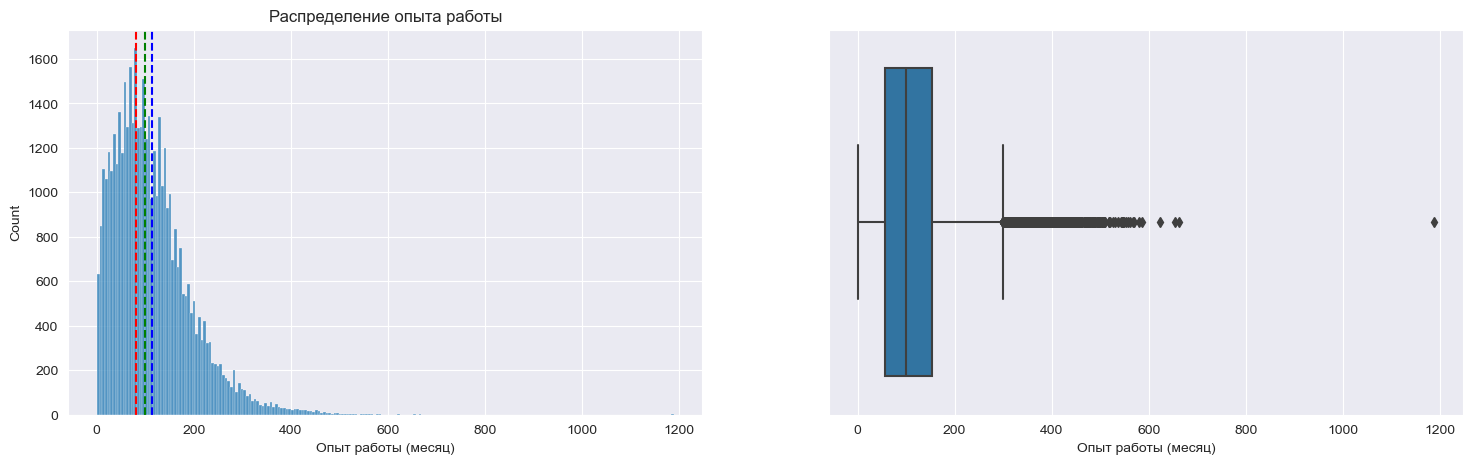

In [835]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
hist_ = sns.histplot(df['Опыт работы (месяц)'], kde=False, ax=axes[0])
mode = df['Опыт работы (месяц)'].mode()[0]
median = df['Опыт работы (месяц)'].median()
mean = df['Опыт работы (месяц)'].mean()
hist_.axvline(mode, color='r', linestyle='--')
hist_.axvline(median, color='g', linestyle='--')
hist_.axvline(mean, color='b', linestyle='--')
hist_.set_title('Распределение опыта работы')
sns.boxplot(x=df['Опыт работы (месяц)'], ax=axes[1]);
Q1 = df['Опыт работы (месяц)'].quantile(0.25)
Q3 = df['Опыт работы (месяц)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f'''
медиана={median} ; среднее={mean:0.2f} ; мода={mode} ;
максимум={df['Опыт работы (месяц)'].max()}
Аномальными значениями можно считать те, что выше {upper_bound}
Большая часть соискателей имеет опыт работы от 0 до 350 месяцев.
''')

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*



Я убрал выбросы(то, что больше, чем 1.5 межквартильных размаха), чтобы можно было увидеть какую-то инфомрацию на
графике.
медиана=59000.0 ; среднее=76521.46 ; мода=50000.0 ; максимум=24304876.0.
Большая часть соискателей ищет работу с зарплатой от 20000 до 60000 рублей.
Аномально высокими значениями можно считать те, что выше 181876.7 рублей.



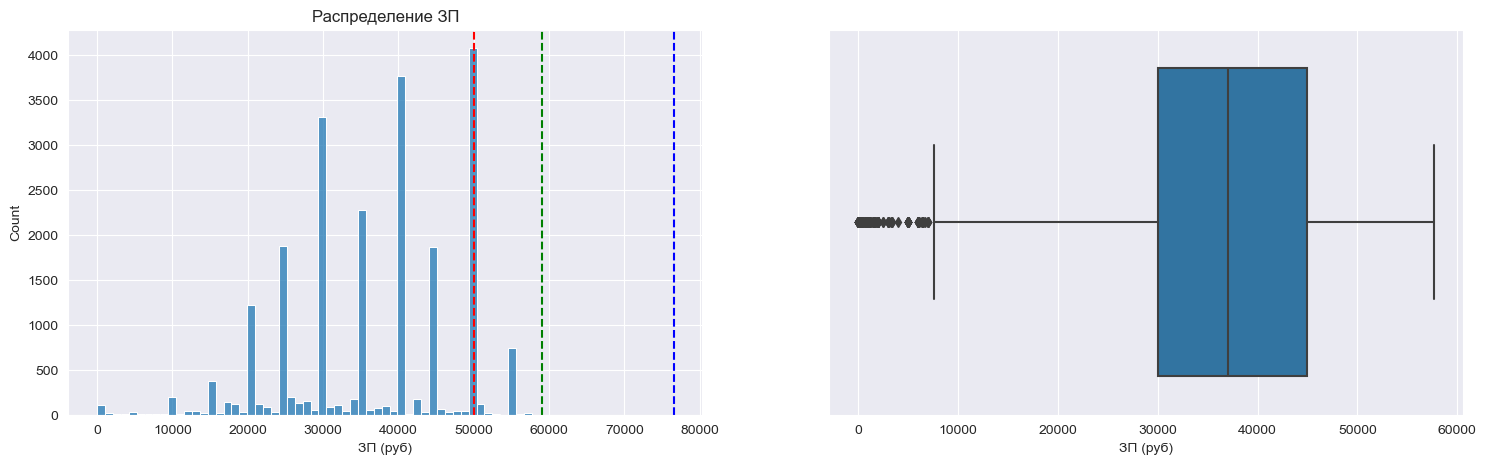

In [836]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

Q1 = df['ЗП (руб)'].quantile(0.25)
Q3 = df['ЗП (руб)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
data_viz = df.loc[df['ЗП (руб)'] < IQR, 'ЗП (руб)']

hist_ = sns.histplot(data_viz, kde=False, ax=axes[0])  # log_scale = Tru
mode = df['ЗП (руб)'].mode()[0]
median = df['ЗП (руб)'].median()
mean = df['ЗП (руб)'].mean()
hist_.axvline(mode, color='r', linestyle='--')
hist_.axvline(median, color='g', linestyle='--')
hist_.axvline(mean, color='b', linestyle='--')
hist_.set_title('Распределение ЗП')
sns.boxplot(x=data_viz, ax=axes[1]);

print(f'''
Я убрал выбросы(то, что больше, чем 1.5 межквартильных размаха), чтобы можно было увидеть какую-то инфомрацию на
графике.
медиана={median} ; среднее={mean:0.2f} ; мода={mode} ; максимум={df['ЗП (руб)'].max()}.
Большая часть соискателей ищет работу с зарплатой от 20000 до 60000 рублей.
Аномально высокими значениями можно считать те, что выше {upper_bound} рублей.
''')

Все аномалии видны благодаря scatter plot. Можно заметить очень молодого кандидата, запрашивающего очень высокую зарплату или несколько пожилых кандидатов с очень низкими требованиями к зарплате


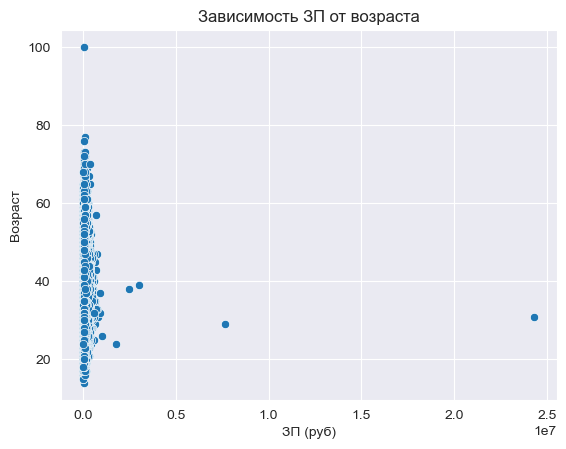

In [837]:
scatter = sns.scatterplot(y=df['Возраст'], x=df['ЗП (руб)'])
plt.title('Зависимость ЗП от возраста');
print("Все аномалии видны благодаря scatter plot. Можно заметить очень молодого кандидата, запрашивающего очень "
      "высокую зарплату или несколько пожилых кандидатов с очень низкими требованиями к зарплате")

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

Наибольший уровень наблюдается для высшего образования, наименьший для среднего и средне-специального. Уровень образования важен для прогнозирования, потому что чаще люди с высшим образованием являются высокооплачиваемыми специалистами, чем с другими уровнями образования.


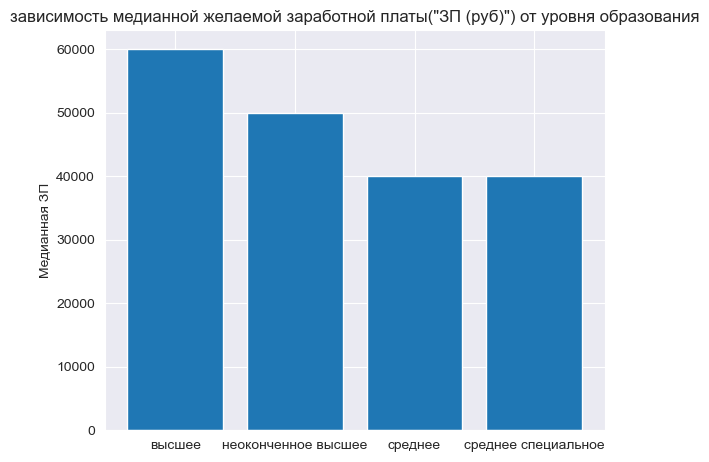

In [838]:
data_viz = df[df["ЗП (руб)"] < 1_000_000]
data_viz = data_viz.groupby('Образование', as_index=False).agg({"ЗП (руб)": 'median'})
#display(data_viz)
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=data_viz['Образование'], height=data_viz["ЗП (руб)"]);
axes.set_ylabel('Медианная ЗП')
axes.set_title('зависимость медианной желаемой заработной платы("ЗП (руб)") от уровня образования');
print("Наибольший уровень наблюдается для высшего образования, наименьший для среднего и средне-специального. Уровень"
      " образования важен для прогнозирования, потому что чаще люди с высшим образованием являются "
      "высокооплачиваемыми специалистами, чем с другими уровнями образования.")

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

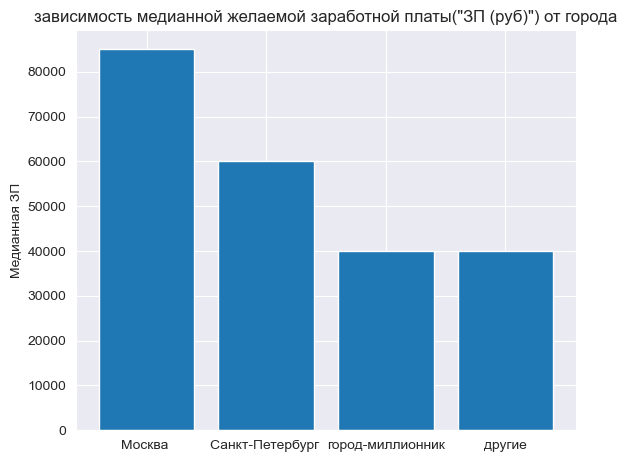

In [839]:
data_viz = df[df["ЗП (руб)"] < 1_000_000]
data_viz = data_viz.groupby("Город", as_index=False).agg({"ЗП (руб)": 'median'})
#display(data_viz)
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=data_viz["Город"], height=data_viz["ЗП (руб)"]);
axes.set_ylabel('Медианная ЗП')
axes.set_title('зависимость медианной желаемой заработной платы("ЗП (руб)") от города');

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

Можно заметить  что соискатели, готовые к переезду и командировкам могут предъявлять более высокие требования к ЗП.


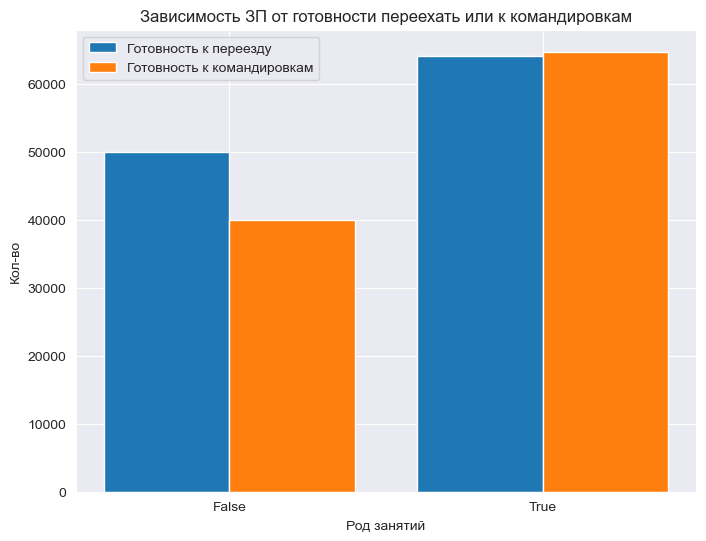

In [840]:
plt.figure(figsize=(8, 6))
data_viz_relocation = df.groupby("Готовность к переезду", as_index=False).agg({"ЗП (руб)": 'median'})
data_viz_trip = df.groupby("Готовность к командировкам", as_index=False).agg({"ЗП (руб)": 'median'})
#display(data_viz_trip)
n_ticks = np.arange(data_viz_trip.shape[0])

offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, data_viz_relocation["ЗП (руб)"], width=w)
plt.bar(n_ticks + offset, data_viz_trip["ЗП (руб)"], width=w)

plt.title('Зависимость ЗП от готовности переехать или к командировкам')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['Готовность к переезду', 'Готовность к командировкам'])
plt.xticks(n_ticks, data_viz_relocation["Готовность к переезду"]);
print("Можно заметить  что соискатели, готовые к переезду и командировкам могут предъявлять более высокие требования "
      "к ЗП.")

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Можно заметить, что у тех соискателей, кто имеет высшее образование, зарплата выше, чем у соискателей того же возраста, но с более низким уровнем образования. Также, независимо от образования, пик зарплат приходится на соискателей в возрасте от 37 до 49 лет(наиболее ярко это видно у людей с высшим).


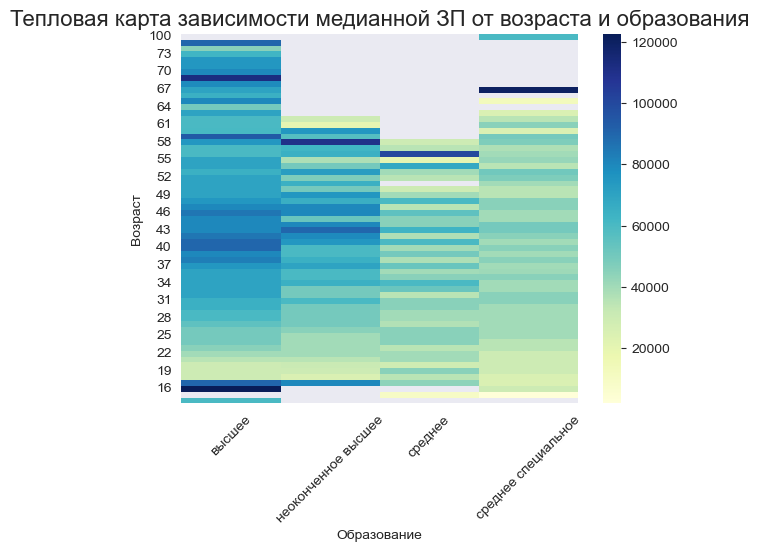

In [841]:
pivot_age_education = pd.pivot_table(df,
                                     values="ЗП (руб)",
                                     index=["Возраст"],
                                     columns=['Образование'],
                                     aggfunc='median',
                                     #fill_value = 0
                                     )
pivot_age_education = pivot_age_education.sort_values("Возраст", ascending=False)
heatmap = sns.heatmap(data=pivot_age_education, cmap='YlGnBu')
heatmap.set_title('Тепловая карта зависимости медианной ЗП от возраста и образования', fontsize=16)
plt.xticks(rotation=45);
print("Можно заметить, что у тех соискателей, кто имеет высшее образование, зарплата выше, чем у соискателей того же "
      "возраста, но с более низким уровнем образования. Также, независимо от образования, пик зарплат приходится на "
      "соискателей в возрасте от 37 до 49 лет(наиболее ярко это видно у людей с высшим).")

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

На графике можно заметить несколько аномалий, также аномалиями можно считать наблюдений, где разница между возрастом и опытом работы меньше 14 лет. Случаев, когда человек пошел работать в 13 и меньше лет не так много и ими можно пренебречь(и это при условии, что соискатель вообще указал правду).


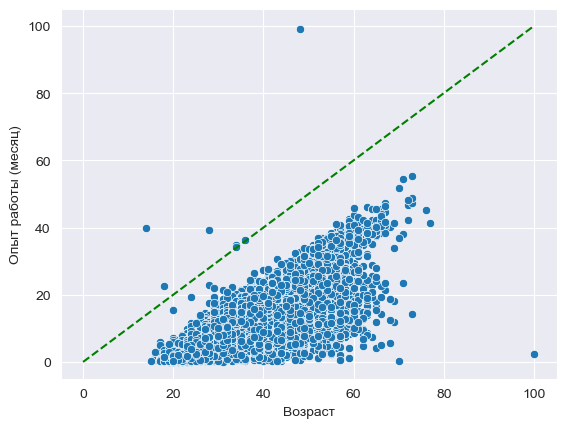

In [842]:
exp_data = df['Опыт работы (месяц)'] / 12
sns.scatterplot(x=df['Возраст'], y=exp_data)
plt.plot([0, 100], [0, 100], color='green', linestyle='--');
print("На графике можно заметить несколько аномалий, также аномалиями можно считать наблюдений, где разница между "
      "возрастом и опытом работы меньше 14 лет. Случаев, когда человек пошел работать в 13 и меньше лет не так много "
      "и ими можно пренебречь(и это при условии, что соискатель вообще указал правду).")

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Если данные репрезентативны и выборка сформирована прафильноб то большая часть соискателей на hh.ru имеет высшее образование. Также, большая часть из них мужчины, а около трети живет в Москве.


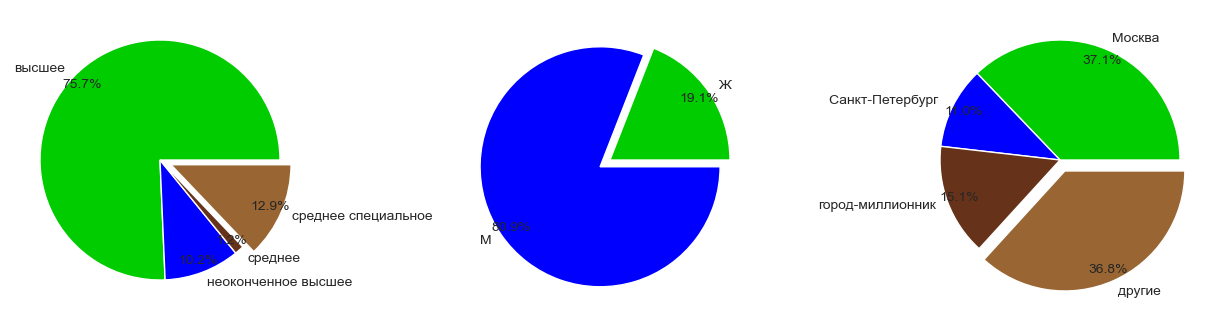

In [843]:
pie_data = df[['Образование', 'Пол', 'Город']]
pie_data_edu = pie_data.groupby("Образование").agg({'Образование': 'count'})
pie_data_gender = pie_data.groupby("Пол").agg({'Пол': 'count'})
pie_data_city = pie_data.groupby("Город").agg({'Город': 'count'})
fig = plt.figure(figsize=(3, 3))
axes1 = fig.add_axes([0, 0, 1, 1])
axes1.pie(
    pie_data_edu['Образование'],
    labels=pie_data_edu.index,
    autopct='%.1f%%',
    pctdistance=0.9,
    colors=[
        (0.0, 0.8, 0.0),
        (0.0, 0.0, 1.0),
        (0.4, 0.2, 0.1),
        (0.6, 0.4, 0.2)],
    explode=[0, 0, 0, 0.1]
);
axes2 = fig.add_axes([1.5, 0, 1, 1])
axes2.pie(
    pie_data_gender['Пол'],
    labels=pie_data_gender.index,
    autopct='%.1f%%',
    pctdistance=0.9,
    colors=[
        (0.0, 0.8, 0.0),
        (0.0, 0.0, 1.0),
        (0.4, 0.2, 0.1),
        (0.6, 0.4, 0.2)],
    explode=[0, 0.1]
);
axes3 = fig.add_axes([3, 0, 1, 1])
axes3.pie(
    pie_data_city['Город'],
    labels=pie_data_city.index,
    autopct='%.1f%%',
    pctdistance=0.9,
    colors=[
        (0.0, 0.8, 0.0),
        (0.0, 0.0, 1.0),
        (0.4, 0.2, 0.1),
        (0.6, 0.4, 0.2)],
    explode=[0, 0, 0, 0.1]
);
print("Если данные репрезентативны и выборка сформирована прафильноб то большая часть соискателей на hh.ru имеет "
      "высшее образование. Также, большая часть из них мужчины, а около трети живет в Москве.")

Можно заметить, некоторые бинарные признаки сильно коррелируют друг с другом, что может означать, что наличие или отсутствие одного признака сильно влияет на наличие или отсутствие другого признака. Самая сильная положителньая связь наблюдается у опыта работы и возраста.


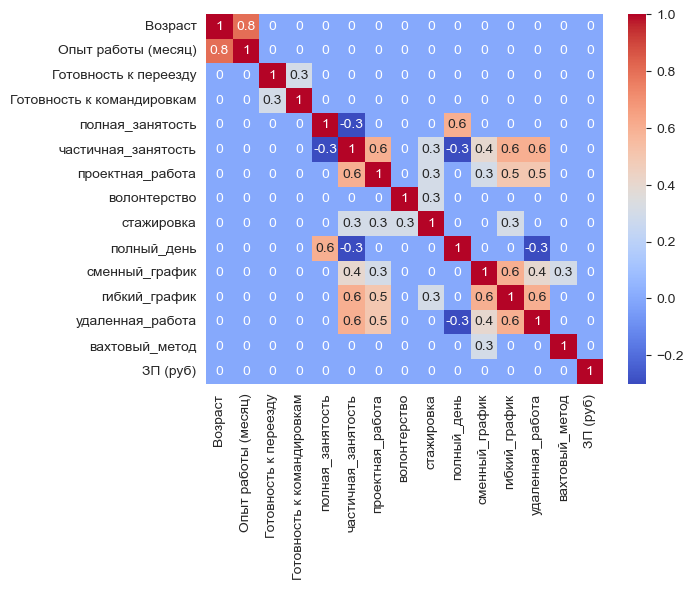

In [844]:
correlation_matrix = df.corr()
correlation_matrix = np.round(correlation_matrix, 1)
correlation_matrix[np.abs(correlation_matrix) < 0.3] = 0
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm');
print("Можно заметить, некоторые бинарные признаки сильно коррелируют друг с другом, что может означать, что наличие "
      "или отсутствие одного признака сильно влияет на наличие или отсутствие другого признака. Самая сильная "
      "положителньая связь наблюдается у опыта работы и возраста.")

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [845]:
df = df.drop_duplicates()

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [846]:
df.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная_занятость                     0
частичная_занятость                  0
проектная_работа                     0
волонтерство                         0
стажировка                           0
полный_день                          0
сменный_график                       0
гибкий_график                        0
удаленная_работа                     0
вахтовый_метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [847]:
df = df[~((df['Последнее/нынешнее место работы'].isna()) & (df['Последняя/нынешняя должность'].isna()))]
df.loc[df['Опыт работы (месяц)'].isna(), 'Опыт работы (месяц)'] = df['Опыт работы (месяц)'].median()

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [848]:
before = df.shape[0]
df = df[(df['ЗП (руб)'] < 1_000_000)]
df = df[(df['ЗП (руб)'] > 1_000)]

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [849]:
df = df[~((df['Опыт работы (месяц)'] / 12) > (df['Возраст']))]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

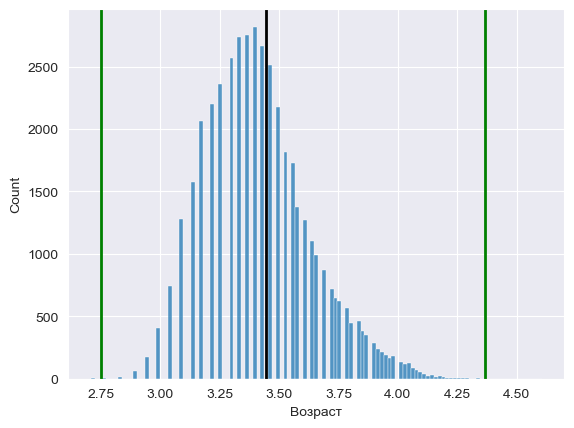

In [850]:
log_age = np.log(df['Возраст'])

mean_log_age = log_age.mean()
std_log_age = log_age.std()
upper_bound = mean_log_age + 4 * std_log_age
lower_bound = mean_log_age - 3 * std_log_age
hist_ = sns.histplot(log_age)
hist_.axvline(log_age.mean(), color='k', lw=2)
hist_.axvline(mean_log_age - 3 * std_log_age, color='g', lw=2)
hist_.axvline(mean_log_age + 4 * std_log_age, color='g', lw=2);

Логарифмическое распределение ассиметрично в левую сторону

In [851]:
print(f'''
Выведу выбросы по методу z-отклонения. Выбросами являются записи,
где возраст меньше {np.exp(lower_bound):0.1f} и больше {np.exp(upper_bound):0.1f}
''')
display(df[log_age < lower_bound])
display(df[log_age > upper_bound])
df = df[(log_age < upper_bound) & (log_age > lower_bound)]


Выведу выбросы по методу z-отклонения. Выбросами являются записи,
где возраст меньше 15.7 и больше 78.9



,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная_занятость,проектная_работа,волонтерство,стажировка,полный_день,сменный_график,гибкий_график,удаленная_работа,вахтовый_метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная_занятость,проектная_работа,волонтерство,стажировка,полный_день,сменный_график,гибкий_график,удаленная_работа,вахтовый_метод,ЗП (руб)
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,True,False,True,True,False,60000.0
